# Fig.4 Population frequency of cooperators by network degree

## ../data/20220507_092452/*.csv

```julia
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :random_4]
weak_selection_list = [true]
calc_payoffs_pattern_list = [1]
hop_game_list = [1]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [5.0]
μ_list = [0.0]
δ_list = [1.0]
```

In [1]:
import glob
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.6, style = 'darkgrid')

In [2]:
# DTYPES = {
#     'network_type': 'category',
#     'weak_selection': bool,
#     'calc_payoffs_pattern': int,
#     'hop_game': int,
#     'hop_learning': int,
#     'b': float,
#     'μ': float,
#     'δ': float,
#     'trial': int,
#     'step': int,
#     'agent_id': int,
#     'is_cooperator': int,
#     'payoff': float,
#     'degree': int
# }

# def load_df(csv_file_name: str) -> pd.DataFrame:
#     return pd.read_csv(csv_file_name, header=None, names=DTYPES.keys(), dtype=DTYPES).groupby([
#         'network_type',
#         'hop_learning',
#         'step',
#         'degree'
#     ]).agg({
#         'is_cooperator': np.mean
#     }).reset_index()

In [3]:
# %%time
# # Load (17min 23s)
# dir_name = '20220507_092452'
# file_list = glob.glob('../data/{}/*.csv'.format(dir_name))
# print(len(file_list))

# df_list = [load_df(file) for file in file_list]
# df = pd.concat(df_list).groupby([
#     'network_type',
#     'hop_learning',
#     'step',
#     'degree'
# ]).agg({
#     'is_cooperator': np.mean
# }).reset_index()
# df.to_csv('../data/20220507_092452/summary.csv')

In [4]:
df = pd.read_csv('../data/20220507_092452/summary.csv')
df

,Unnamed: 0,network_type,hop_learning,step,degree,is_cooperator
0,0,random_4,1,1,1,0.497518
1,1,random_4,1,1,2,0.510546
2,2,random_4,1,1,3,0.505584
3,3,random_4,1,1,4,0.498940
4,4,random_4,1,1,5,0.503968
...,...,...,...,...,...,...
2819995,2819995,scale_free_4,10,1000,146,NaN
2819996,2819996,scale_free_4,10,1000,151,NaN
2819997,2819997,scale_free_4,10,1000,152,NaN
2819998,2819998,scale_free_4,10,1000,159,NaN


In [66]:
def degree_level(degree: int) -> str:
    if degree < 4:
        return '4_low'
    elif degree < 8:
        return '3_middle'
    elif degree < 16:
        return '2_high'
    else:
        return '1_very high'
        # return 'super high'

In [67]:
df['degree_level'] = df.degree.apply(degree_level)
df['100step'] = df.step.apply(lambda x: int(x / 100))
df

,Unnamed: 0,network_type,hop_learning,step,degree,is_cooperator,degree_level,100step,10step
0,0,random_4,1,1,1,0.497518,4_low,0,0
1,1,random_4,1,1,2,0.510546,4_low,0,0
2,2,random_4,1,1,3,0.505584,4_low,0,0
3,3,random_4,1,1,4,0.498940,3_middle,0,0
4,4,random_4,1,1,5,0.503968,3_middle,0,0
...,...,...,...,...,...,...,...,...,...
2819995,2819995,scale_free_4,10,1000,146,NaN,1_very high,10,100
2819996,2819996,scale_free_4,10,1000,151,NaN,1_very high,10,100
2819997,2819997,scale_free_4,10,1000,152,NaN,1_very high,10,100
2819998,2819998,scale_free_4,10,1000,159,NaN,1_very high,10,100


In [68]:
df_sf = df[
    (df.is_cooperator.notna())
].groupby([
    'network_type',
    'hop_learning',
    '100step',
    'degree_level'
]).agg({
    'is_cooperator': np.mean
}).reset_index()
df_sf

,network_type,hop_learning,100step,degree_level,is_cooperator
0,random_4,1,0,1_very high,0.171717
1,random_4,1,0,2_high,0.408644
2,random_4,1,0,3_middle,0.436057
3,random_4,1,0,4_low,0.433208
4,random_4,1,1,1_very high,0.350000
...,...,...,...,...,...
675,scale_free_4,10,9,4_low,0.193424
676,scale_free_4,10,10,1_very high,0.212299
677,scale_free_4,10,10,2_high,0.191673
678,scale_free_4,10,10,3_middle,0.190307


CPU times: user 1.49 s, sys: 19.8 ms, total: 1.51 s
Wall time: 1.51 s


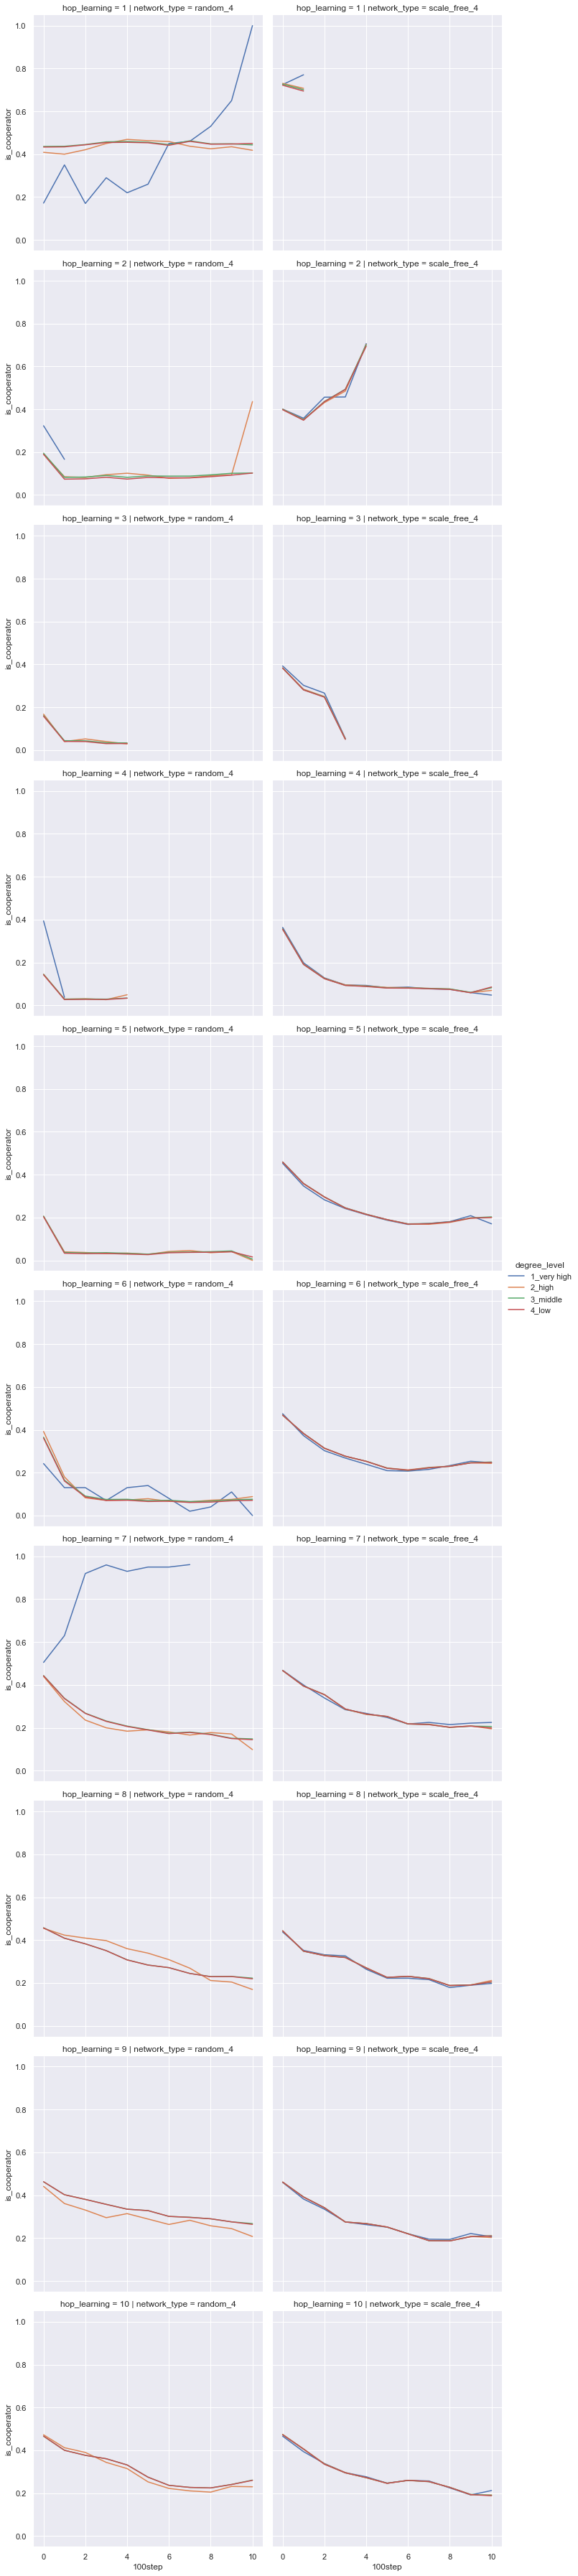

In [69]:
%%time
sns.relplot(
    data=df_sf,
    x='100step',
    y='is_cooperator',
    hue='degree_level',
    col='network_type',
    row='hop_learning',
    kind='line'
)

In [ ]:
%%time
sns.relplot(
    data=df,
    x='step',
    y='is_cooperator',
    hue='degree_level',
    row='network_type',
    col='hop_learning',
    kind='line'
)

In [9]:
%%time
# df_degree_c_rate = df.groupby([
#     'network_type',
#     'hop_learning',
#     'degree'
# ]).agg({
#     'is_cooperator': np.mean
# }).reset_index()

df_degree_c_rate = df.groupby(['network_type', 'hop_learning']).corr().reset_index()
df_degree_c_rate = df_degree_c_rate[df_degree_c_rate.level_2 == 'degree'][['network_type', 'hop_learning', 'is_cooperator']].reset_index(drop=True)
df_degree_c_rate.columns = [
    'network_type',
    'hop_learning',
    'corr_degree_and_coop_rate'
]
df_degree_c_rate

CPU times: user 449 ms, sys: 51.9 ms, total: 501 ms
Wall time: 501 ms


,network_type,hop_learning,corr_degree_and_coop_rate
0,random_4,1,-0.107721
1,random_4,2,0.061874
2,random_4,3,0.069306
3,random_4,4,0.083354
4,random_4,5,0.041534
5,random_4,6,0.022983
6,random_4,7,0.287744
7,random_4,8,0.137330
8,random_4,9,-0.196119
9,random_4,10,-0.058388


CPU times: user 32.3 ms, sys: 2.62 ms, total: 34.9 ms
Wall time: 32.9 ms


<AxesSubplot:xlabel='hop_learning', ylabel='corr_degree_and_coop_rate'>

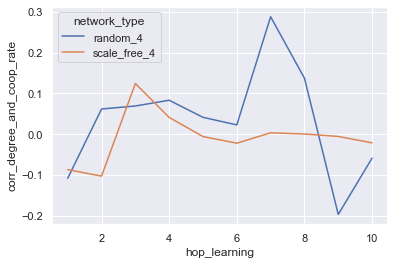

In [10]:
%%time
sns.set(font_scale = 1.0, style = 'darkgrid')
sns.lineplot(x='hop_learning', y='corr_degree_and_coop_rate', hue='network_type', data=df_degree_c_rate)